In [1]:
import matplotlib.pyplot as plt
import pandas as pd
file1_path = 'C:\\Users\\tlsdb\\빅데프팀플\\201912_202011.csv'
file2_path = 'C:\\Users\\tlsdb\\빅데프팀플\\202012_202111.csv'
file3_path = 'C:\\Users\\tlsdb\\빅데프팀플\\202112_202211.csv'
file4_path = 'C:\\Users\\tlsdb\\빅데프팀플\\202212_202311.csv'
file5_path = 'C:\\Users\\tlsdb\\빅데프팀플\\202312_202411.csv'
# 2. CSV 파일 로드
data_2019_2020 = pd.read_csv(file1_path, encoding='cp949', engine='python')
data_2020_2021 = pd.read_csv(file2_path, encoding='cp949', engine='python')
data_2021_2022 = pd.read_csv(file3_path, encoding='cp949', engine='python')
data_2022_2023 = pd.read_csv(file4_path, encoding='cp949', engine='python')
data_2023_2024 = pd.read_csv(file5_path, encoding='cp949', engine='python')
combined_changes = pd.concat([data_2019_2020, data_2020_2021, data_2021_2022,data_2022_2023,
                          data_2023_2024], ignore_index=True)
combined_changes['거래금액(만원)'] = pd.to_numeric(
    combined_changes['거래금액(만원)'].str.replace(',', ''), errors='coerce'
)
# Function to calculate monthly average price per m2 and its change
def calculate_monthly_change(data):
    data['㎡당 거래금액(만원)'] = data['거래금액(만원)'] / data['전용면적(㎡)']
    lower_bound = data['㎡당 거래금액(만원)'].quantile(0.01)
    upper_bound = data['㎡당 거래금액(만원)'].quantile(0.99)
    filtered_data = data[
        (data['㎡당 거래금액(만원)'] >= lower_bound) &
        (data['㎡당 거래금액(만원)'] <= upper_bound)
    ]
    monthly_avg_price = filtered_data.groupby('계약년월')['㎡당 거래금액(만원)'].mean().reset_index()
    monthly_avg_price['변동률(%)'] = monthly_avg_price['㎡당 거래금액(만원)'].pct_change() * 100
    monthly_avg_price['계약년월'] = pd.to_datetime(monthly_avg_price['계약년월'], format='%Y%m')
    return monthly_avg_price


# Add region classification to each dataset
combined_changes = calculate_monthly_change(combined_changes)

# 결과 확인
print(combined_changes.head())



        계약년월  ㎡당 거래금액(만원)    변동률(%)
0 2019-12-01  1012.614488       NaN
1 2020-01-01   916.106507 -9.530575
2 2020-02-01   947.039072  3.376525
3 2020-03-01   921.603875 -2.685760
4 2020-04-01   970.216683  5.274805


In [4]:
file_path ='C:\\Users\\tlsdb\\빅데프팀플\\words.txt'
import pandas as pd
# 텍스트 파일 읽기
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# 읽은 데이터 출력 (확인용)
for line in lines[:10]:  # 상위 10줄만 출력
    print(line.strip())
data = pd.read_csv(file_path, delimiter=',')  # 쉼표(,)를 구분자로 사용

# 데이터 확인
print(data.head())     

월,정책 1,정책 2,정책 3,정책 4,정책type
201911,150,428,41,974,None
201912,908,2015,375,5647,None
202001,682,2902,271,2536,None
202002,624,2157,287,1117,None
202003,1072,3248,596,3759,None
202004,1074,2659,254,3363,None
202005,762,3211,229,1712,None
202006,1000,5641,501,2053,None
202007,1158,11173,278,6887,정책 2
        월  정책 1  정책 2  정책 3  정책 4 정책type
0  201911   150   428    41   974   None
1  201912   908  2015   375  5647   None
2  202001   682  2902   271  2536   None
3  202002   624  2157   287  1117   None
4  202003  1072  3248   596  3759   None


In [5]:
# 월 형식 맞추기 (combined_changes의 계약년월은 YYYY-MM-DD 형식, data의 월은 YYYYMM 형식)
data['월'] = data['월'].astype(str)  # 문자열로 변환

# '계약년월'을 datetime으로 변환하고 'YYYYMM' 형식의 문자열로 변환
combined_changes['계약년월'] = pd.to_datetime(combined_changes['계약년월'])
combined_changes['월'] = combined_changes['계약년월'].dt.strftime('%Y%m')  # 'YYYYMM' 형식으로 변환

# 'data'의 '정책type'을 'combined_changes'에 병합
combined_changes = pd.merge(combined_changes, data[['월', '정책type']], on='월', how='left')

# 결과 확인
print(combined_changes)

         계약년월  ㎡당 거래금액(만원)     변동률(%)       월 정책type
0  2019-12-01  1012.614488        NaN  201912   None
1  2020-01-01   916.106507  -9.530575  202001   None
2  2020-02-01   947.039072   3.376525  202002   None
3  2020-03-01   921.603875  -2.685760  202003   None
4  2020-04-01   970.216683   5.274805  202004   None
5  2020-05-01  1059.246163   9.176247  202005   None
6  2020-06-01  1124.590456   6.168943  202006   None
7  2020-07-01  1130.411252   0.517592  202007   정책 2
8  2020-08-01  1224.407542   8.315229  202008   정책 2
9  2020-09-01  1223.085389  -0.107983  202009   정책 2
10 2020-10-01  1205.101266  -1.470390  202010   정책 2
11 2020-11-01  1304.730513   8.267293  202011   정책 2
12 2020-12-01  1350.501269   3.508062  202012   None
13 2021-01-01  1335.121187  -1.138842  202101   None
14 2021-02-01  1314.032586  -1.579527  202102   None
15 2021-03-01  1283.792632  -2.301309  202103   정책 3
16 2021-04-01  1358.411781   5.812399  202104   정책 3
17 2021-05-01  1328.407590  -2.208770  202105 

In [6]:
# 정책type 값별 개수 세기
policy_counts = combined_changes['정책type'].value_counts()

# 결과 출력
print("정책type 값별 개수:")
print(policy_counts)


정책type 값별 개수:
None    42
정책 3     9
정책 2     5
정책 1     4
Name: 정책type, dtype: int64


In [7]:
import pandas as pd

# 월 컬럼을 datetime 형식으로 변환
combined_changes['계약년월'] = pd.to_datetime(combined_changes['월'], format='%Y%m')

# 결과를 저장할 리스트
average_changes = []

# 정책별로 처리
for policy in combined_changes['정책type'].unique():
    if policy == 'None':  # 'None' 제외
        continue

    # 해당 정책 데이터 필터링
    policy_data = combined_changes[combined_changes['정책type'] == policy]

    # 정책 시행 후 3개월, 6개월 동안의 평균 변동률 계산
    for _, row in policy_data.iterrows():
        start_date = row['계약년월']  # 정책 시행 월
        future_data = combined_changes[combined_changes['계약년월'] > start_date]  # 시행 이후 데이터

        for period in range(1, 7):  # 1개월부터 6개월까지
            # 기간 종료 날짜 계산
            end_date = start_date + pd.DateOffset(months=period)
            period_data = future_data[future_data['계약년월'] <= end_date]

            # 변동률 평균 계산
            if not period_data.empty:
                avg_change = period_data['변동률(%)'].mean()
                average_changes.append({
                    '정책type': policy,
                    '기간(개월)': period,
                    '변동률 평균(%)': avg_change
                })

# 결과를 데이터프레임으로 변환
average_change_df = pd.DataFrame(average_changes)

# 결과 출력
print(average_change_df)


    정책type  기간(개월)  변동률 평균(%)
0     정책 2       1   8.315229
1     정책 2       2   4.103623
2     정책 2       3   2.245619
3     정책 2       4   3.751037
4     정책 2       5   3.702442
..     ...     ...        ...
103   정책 1       2  -1.884010
104   정책 1       3  -1.949216
105   정책 1       4  -1.347877
106   정책 1       5  -1.347877
107   정책 1       6  -1.347877

[108 rows x 3 columns]


In [8]:
# 정책 이름 매핑
policy_mapping = {
    '정책 1': '매매 정책',
    '정책 2': '임대 정책',
    '정책 3': '조세 및 대출'
}

# 정책 이름 변경
average_change_df['정책type'] = average_change_df['정책type'].replace(policy_mapping)

# 정책별 기초 통계량
summary_stats = average_change_df.groupby('정책type')['변동률 평균(%)'].agg(['mean', 'min', 'max', 'std']).reset_index()
print("정책별 기초 통계량:")
print(summary_stats)


정책별 기초 통계량:
    정책type      mean       min       max       std
0    매매 정책 -0.096191 -2.280031  2.729647  1.498638
1    임대 정책  2.373448 -1.470390  8.315229  2.279424
2  조세 및 대출  1.102106 -5.046130  5.812399  2.209865


C:\Users\tlsdb\AppData\Local\Temp\ipykernel_113252\745714246.py:12: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\tlsdb\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


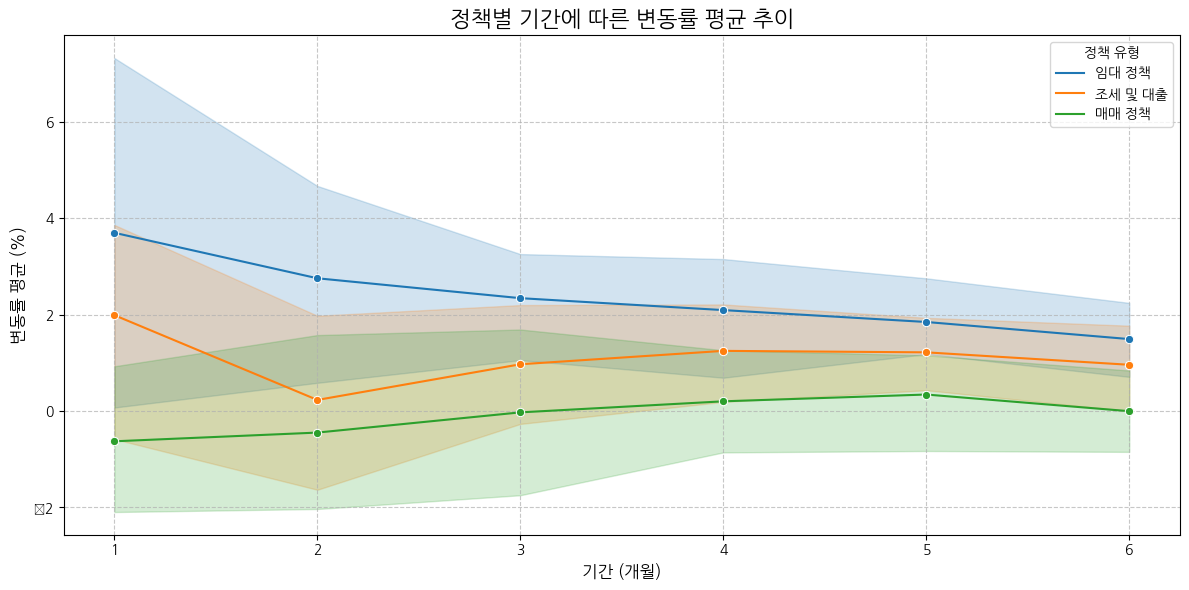

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# 정책별 기간에 따른 변동률 평균 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_change_df, x='기간(개월)', y='변동률 평균(%)', hue='정책type', marker='o')
plt.title('정책별 기간에 따른 변동률 평균 추이', fontsize=16)
plt.xlabel('기간 (개월)', fontsize=12)
plt.ylabel('변동률 평균 (%)', fontsize=12)
plt.legend(title='정책 유형', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


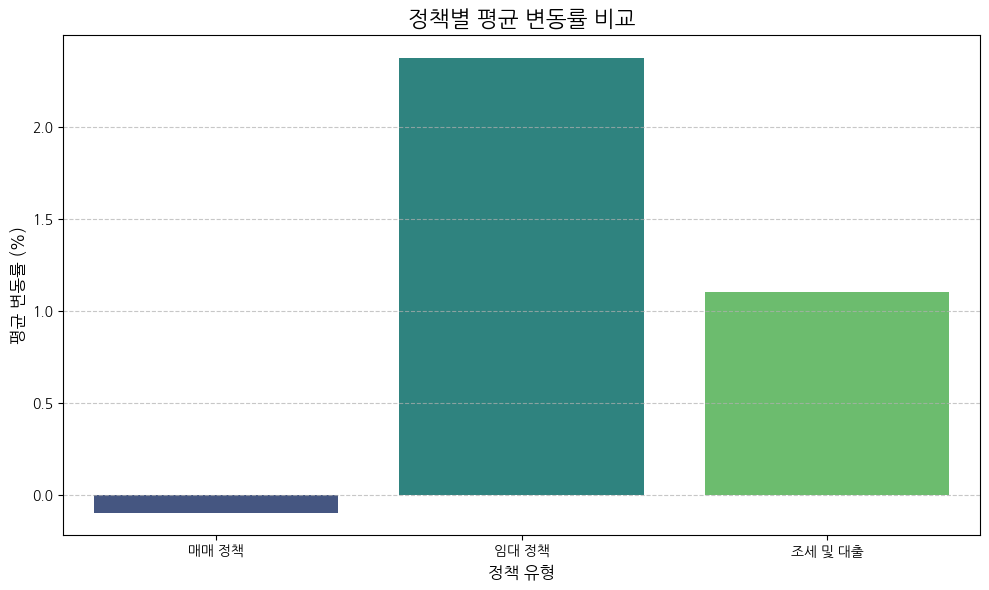

In [99]:
# 정책별 평균 변동률 비교
policy_avg_change = average_change_df.groupby('정책type')['변동률 평균(%)'].mean().reset_index()

# 막대그래프
plt.figure(figsize=(10, 6))
sns.barplot(data=policy_avg_change, x='정책type', y='변동률 평균(%)', palette='viridis')
plt.title('정책별 평균 변동률 비교', fontsize=16)
plt.xlabel('정책 유형', fontsize=12)
plt.ylabel('평균 변동률 (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


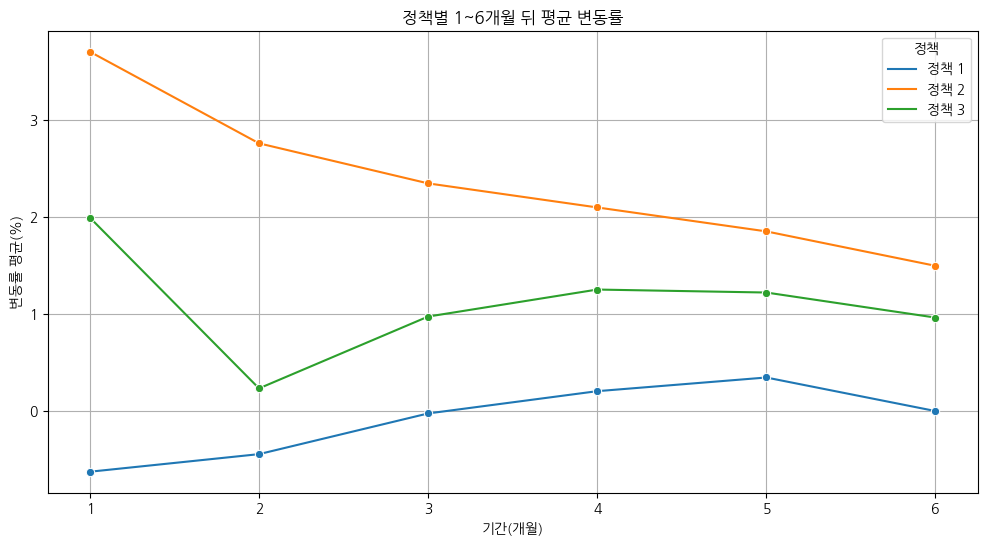

In [43]:
grouped_average_change = (
    average_change_df.groupby(['정책type', '기간(개월)'], as_index=False)['변동률 평균(%)']
    .mean()
)
grouped_average_change

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_average_change, x='기간(개월)', y='변동률 평균(%)', hue='정책type', marker='o')
plt.title('정책별 1~6개월 뒤 평균 변동률')
plt.xlabel('기간(개월)')
plt.ylabel('변동률 평균(%)')
plt.grid(True)
plt.legend(title='정책')
plt.show()

In [25]:
from scipy.stats import f_oneway

# 정책별 변동률 데이터 준비
policy_groups = []
for policy in grouped_average_change['정책type'].unique():
    policy_data = grouped_average_change[grouped_average_change['정책type'] == policy]['변동률 평균(%)']
    policy_groups.append(policy_data)

# ANOVA 수행
f_stat, p_value = f_oneway(*policy_groups)

# 결과 출력
print("ANOVA 결과:")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4e}")

# 결과 해석
if p_value < 0.05:
    print("정책별로 변동률 평균에 유의미한 차이가 있습니다.")
else:
    print("정책별로 변동률 평균에 유의미한 차이가 없습니다.")


ANOVA 결과:
F-statistic: 25.5660
P-value: 1.4709e-05
정책별로 변동률 평균에 유의미한 차이가 있습니다.


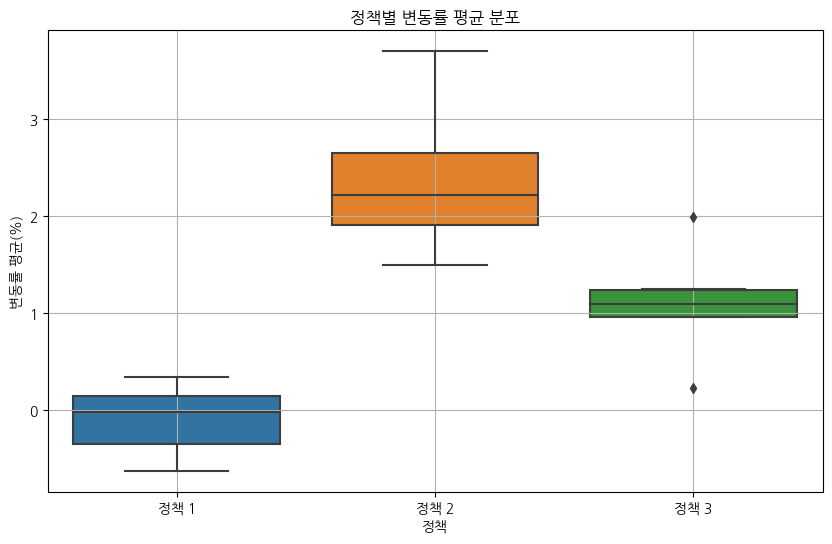

In [45]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='정책type', y='변동률 평균(%)', data=grouped_average_change)
plt.title('정책별 변동률 평균 분포')
plt.xlabel('정책')
plt.ylabel('변동률 평균(%)')
plt.grid(True)
plt.show()

C:\Users\tlsdb\AppData\Local\Temp\ipykernel_125956\1790841801.py:18: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\tlsdb\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


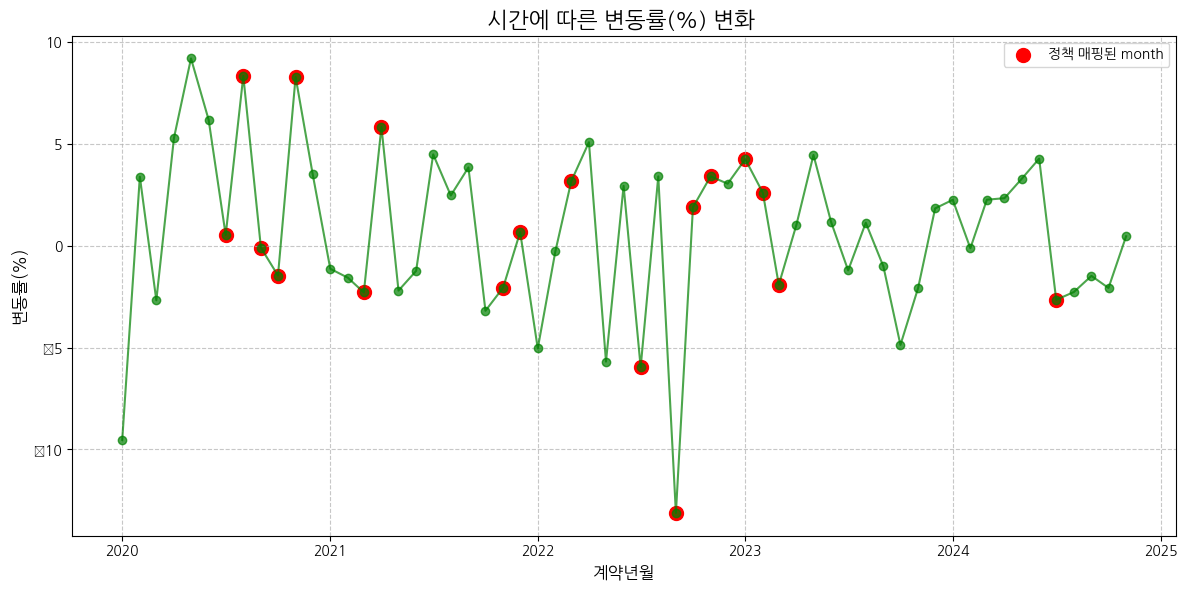

In [9]:
filtered_data = combined_changes[combined_changes['정책type'] != 'None']

# 그래프 그리기
plt.figure(figsize=(12, 6))

# 전체 데이터 (초록색 선)
plt.plot(combined_changes['계약년월'], combined_changes['변동률(%)'], marker='o', color='green', linestyle='-', alpha=0.7)

# 정책 매핑 데이터 (빨간색 점)
plt.scatter(filtered_data['계약년월'], filtered_data['변동률(%)'], color='red', label='정책 매핑된 month', s=100)

# 그래프 꾸미기
plt.title('시간에 따른 변동률(%) 변화 ', fontsize=16)
plt.xlabel('계약년월', fontsize=12)
plt.ylabel('변동률(%)', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

C:\Users\tlsdb\AppData\Local\Temp\ipykernel_125956\3768398683.py:38: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\tlsdb\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


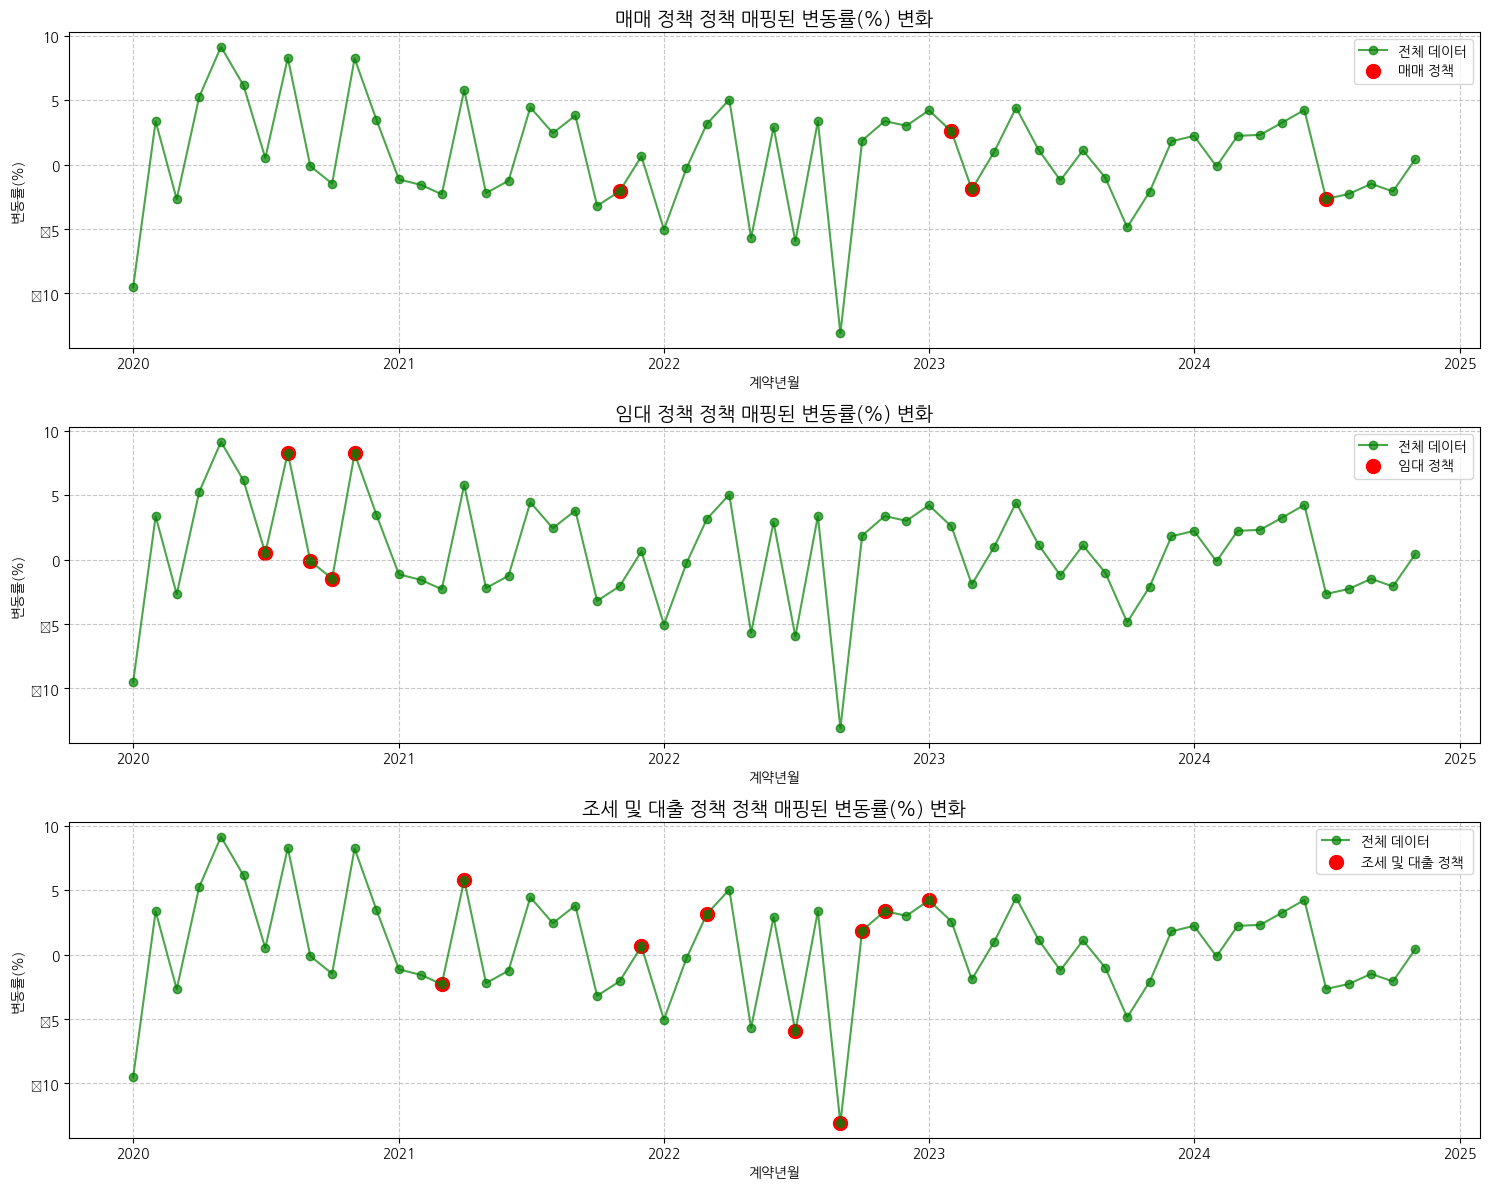

In [19]:
import matplotlib.pyplot as plt

# 정책 매핑
policy_mapping = {
    '정책 1': '매매 정책',
    '정책 2': '임대 정책',
    '정책 3': '조세 및 대출 정책'
}

# 정책 이름 변경
combined_changes['정책type'] = combined_changes['정책type'].replace(policy_mapping)

# 정책별 데이터 필터링
policy_types = ['매매 정책', '임대 정책', '조세 및 대출 정책']

# 그래프 그리기
plt.figure(figsize=(15, 12))  # 전체 그래프 크기 설정

for idx, policy in enumerate(policy_types, 1):
    # 특정 정책 데이터만 필터링
    filtered_data = combined_changes[
        (combined_changes['정책type'] != 'None') & (combined_changes['정책type'] == policy)
    ]
    
    # 서브플롯 설정
    plt.subplot(3, 1, idx)  # 3행 1열의 그래프 중 idx번째
    plt.plot(combined_changes['계약년월'], combined_changes['변동률(%)'], marker='o', color='green', linestyle='-', alpha=0.7, label='전체 데이터')
    plt.scatter(filtered_data['계약년월'], filtered_data['변동률(%)'], color='red', label=f'{policy} ', s=100)

    # 그래프 꾸미기
    plt.title(f'{policy} 정책 매핑된 변동률(%) 변화', fontsize=14)
    plt.xlabel('계약년월', fontsize=10)
    plt.ylabel('변동률(%)', fontsize=10)
    plt.grid(axis='both', linestyle='--', alpha=0.7)
    plt.legend(fontsize=10)

# 그래프 간격 조정 및 표시
plt.tight_layout()
plt.show()


In [26]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_result = pairwise_tukeyhsd(
    endog=grouped_average_change['변동률 평균(%)'],  # 종속변수
    groups=grouped_average_change['정책type'],      # 그룹 변수
    alpha=0.05                                      # 유의 수준
)

# Tukey 테스트 결과 출력
print(tukey_result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  정책 1   정책 2   2.4696    0.0  1.5724  3.3669   True
  정책 1   정책 3   1.1983 0.0091  0.3011  2.0955   True
  정책 2   정책 3  -1.2713 0.0059 -2.1686 -0.3741   True
----------------------------------------------------


In [87]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# 정책 이름 매핑
policy_name_mapping = {
    '정책 1': '매매 정책',
    '정책 2': '임대 정책',
    '정책 3': '대출 및 조세정책'
}

# 사용자 입력: 기준 month
while True:
    try:
        target_month = input("기준 month를 입력하세요 (예: 2023-05): ")
        target_date = pd.to_datetime(target_month, format='%Y-%m')
        break
    except ValueError:
        print("올바른 형식으로 입력해주세요 (예: 2023-05).")

# combined_changes의 계약년월을 datetime으로 변환
combined_changes['계약년월'] = pd.to_datetime(combined_changes['월'], format='%Y%m')

# 정책이 있는 데이터만 필터링 (정책type이 'None'이 아닌 경우)
filtered_combined = combined_changes[combined_changes['정책type'] != 'None']

# 기준 month와 각 정책 시행일의 시차 계산
filtered_combined['시차(개월)'] = (
    (target_date.year - filtered_combined['계약년월'].dt.year) * 12 +
    (target_date.month - filtered_combined['계약년월'].dt.month)
)

# 시차가 1~6개월인 데이터만 필터링
policies_in_range = filtered_combined[
    (filtered_combined['시차(개월)'] > 0) & (filtered_combined['시차(개월)'] <= 6)
]

# 새로 만든 데이터를 활용해 정책별 변동률 가져오기
policies_in_range = policies_in_range.merge(
    grouped_average_change,
    left_on=['정책type', '시차(개월)'],
    right_on=['정책type', '기간(개월)'],
    how='left'
)

# 정책 데이터 유효성 검사 및 결과 출력
if policies_in_range.empty:
    print(f"기준 month: {target_month}")
    print("해당 기간 동안 영향을 미친 정책 데이터가 없습니다.")
else:
    # 정책 이름 매핑 적용
    policies_in_range['정책type'] = policies_in_range['정책type'].map(policy_name_mapping)
    
    # 변동률 절대값 기준으로 정렬
    policies_in_range['변동률_절대값'] = policies_in_range['변동률 평균(%)'].abs()
    policies_in_range = policies_in_range[['정책type', '월', '변동률 평균(%)', '변동률_절대값']].sort_values(by='변동률_절대값', ascending=False)
    
    # 입력된 기준 month의 실제 변동률 가져오기
    actual_change = combined_changes.loc[
        combined_changes['계약년월'] == target_date, '변동률(%)'
    ].values

    print(f"기준 month: {target_month}")
    print("가장 큰 평균 변동률을 미친 정책:")
    # 가장 큰 변동률을 가진 정책 출력 (절대값 기준이지만 원래 변동률 값 출력)
    print(policies_in_range.iloc[0][['정책type', '월', '변동률 평균(%)']])
    
    # 실제 변동률 출력
    if len(actual_change) > 0:
        print(f"{target_month}의 실제 변동률: {actual_change[0]:.2f}%")
    else:
        print(f"{target_month}의 실제 변동률 데이터를 찾을 수 없습니다.")

    # RMSE와 MAE 계산
    if len(actual_change) > 0:
        calculated_change = policies_in_range.iloc[0]['변동률 평균(%)']
        rmse = np.sqrt(mean_squared_error([actual_change[0]], [calculated_change]))
        mae = mean_absolute_error([actual_change[0]], [calculated_change])
        print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")
        
    else:
        print(" 실제 변동률 데이터가 없습니다.")


기준 month를 입력하세요 (예: 2023-05):  2024-08


기준 month: 2024-08
가장 큰 평균 변동률을 미친 정책:
정책type          매매 정책
월              202407
변동률 평균(%)   -0.631611
Name: 0, dtype: object
2024-08의 실제 변동률: -2.28%
RMSE (Root Mean Squared Error): 1.6484


C:\Users\tlsdb\AppData\Local\Temp\ipykernel_113252\497277292.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_changes['계약년월'] = pd.to_datetime(combined_changes['월'], format='%Y%m')
C:\Users\tlsdb\AppData\Local\Temp\ipykernel_113252\497277292.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_combined['시차(개월)'] = (


In [6]:
file_path ='C:\\Users\\tlsdb\\빅데프팀플\\5policies_수정.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()
data = pd.read_csv(file_path, delimiter=',')  # 쉼표(,)를 구분자로 사용

# 데이터 확인
print(data.head()) 

        월  정책 1  정책 2  정책 3  정책 4 정책type
0  201911   150   428    41   974   None
1  201912   908  2015   375  5647   None
2  202001   682  2902   271  2536   None
3  202002   624  2157   287  1117   None
4  202003  1072  3248   596  3759   None
